In [1]:
import os, pickle
import pandas as pd
import seaborn as sns
import matplotlib
sns.set_theme(style="whitegrid")


In [2]:
old_files = []

In [3]:
def load_benchmark_data(base_dir = 'key_averages'):
    files = os.listdir(base_dir)
    name, weights, grads, opt, act, fn, compiled = [],[],[],[],[],[], []
    cput, gput, cpum, gpum = [],[],[],[]
    for file in files:
        name.append(file.removesuffix('.pkl'))
        desc = file.removesuffix('.pkl').split('-')
        if 'compiled' in file:
            compiled.append(True)
            stash_fn = desc[-2]
            tensors_tracker = desc[:-2]
        else:
            compiled.append(False)
            stash_fn = desc[-1]
            tensors_tracker = desc[:-1]

        fn.append(stash_fn)
        weights.append(True) if 'weights' in tensors_tracker else weights.append(False)
        grads.append(True) if 'gradients' in tensors_tracker else grads.append(False)
        opt.append(True) if 'opt_state' in tensors_tracker else opt.append(False)
        act.append(True) if 'activations' in tensors_tracker else act.append(False)

        with open(base_dir + '/' + file, 'rb') as f:
            ka = pickle.load(f)

        cpu_time, device_time, cpu_mem, device_mem = ka.total_average().self_cpu_time_total,ka.total_average().self_device_time_total,ka.total_average().device_memory_usage,ka.total_average().cpu_memory_usage

        cput.append(cpu_time)
        gput.append(device_time)
        cpum.append(cpu_mem)
        gpum.append(device_mem)

    return pd.DataFrame({
        'config_name' : name,
        'weights_tracked' : weights,
        'grad_tracked' : grads,
        'opt_state_tracker' : opt,
        'activations_tracked' : act,
        'cpu_time' : cput,
        'gpu_time' : gput,
        'cpu_mem' : cpum,
        'gpu_mem' : gpum,
        'fn' : fn,
        'compiled': compiled})
    
df = load_benchmark_data()
df.config_name = df.config_name.apply(lambda x: x.removesuffix('-compiled'))
df['relative_gpu_time'] = df.gpu_time / df.gpu_time.min()


Text(0.5, 0.98, 'STASH_ALL_STATS_AND_HIST')

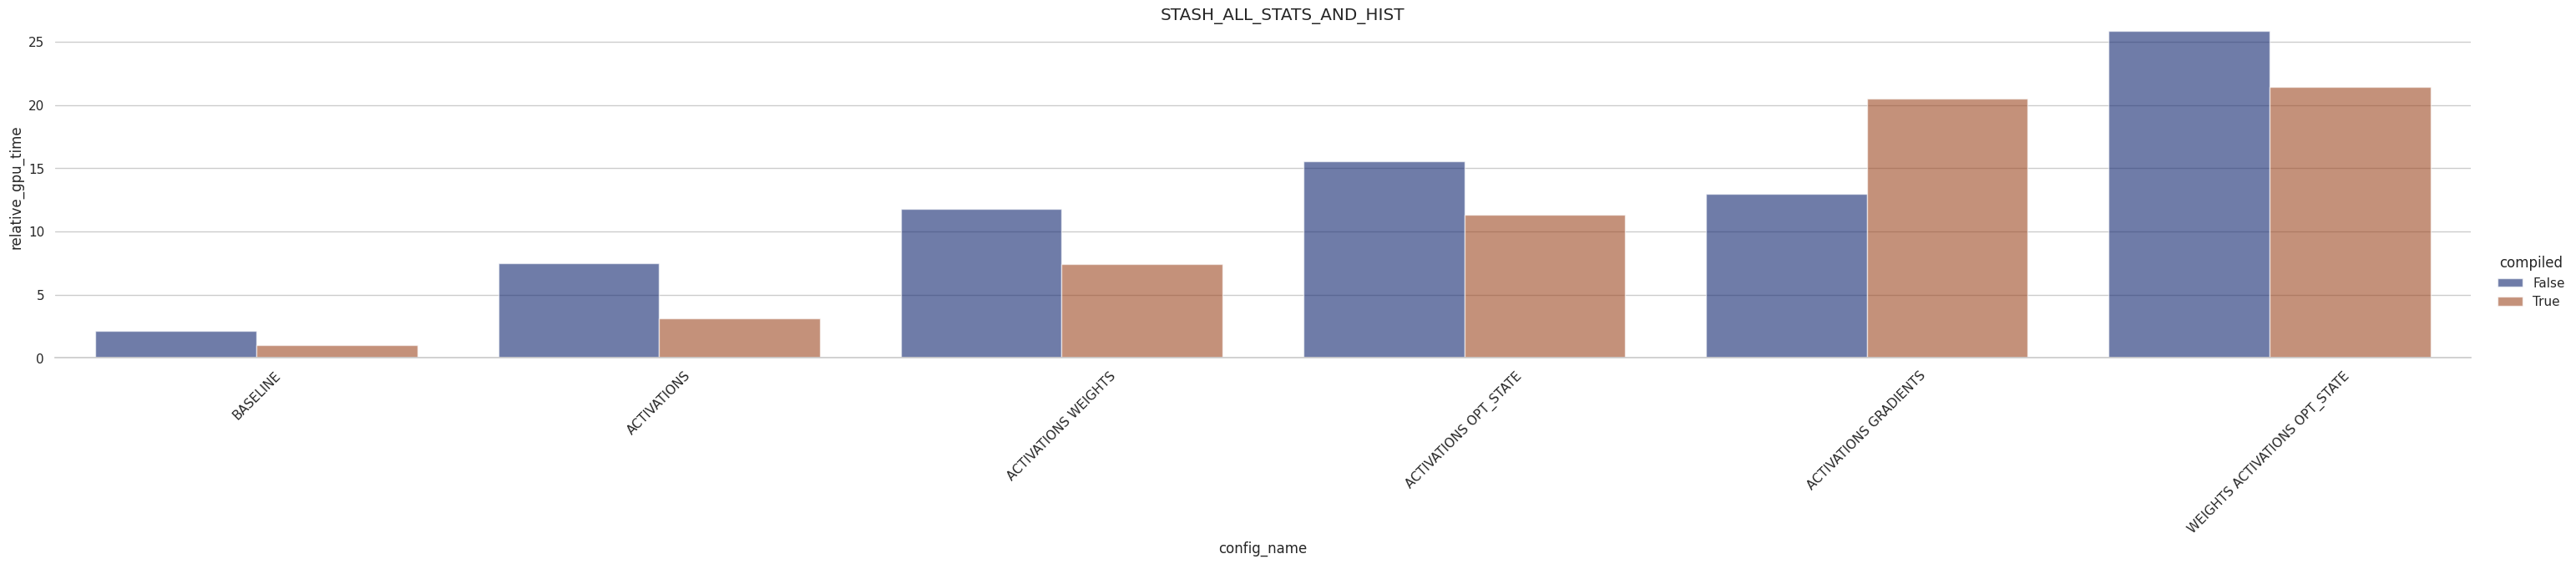

In [4]:
stashfn = 'stash_all_stats_and_hist'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='relative_gpu_time',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.ax.xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())


Text(0.5, 0.98, 'STASH_HIST')

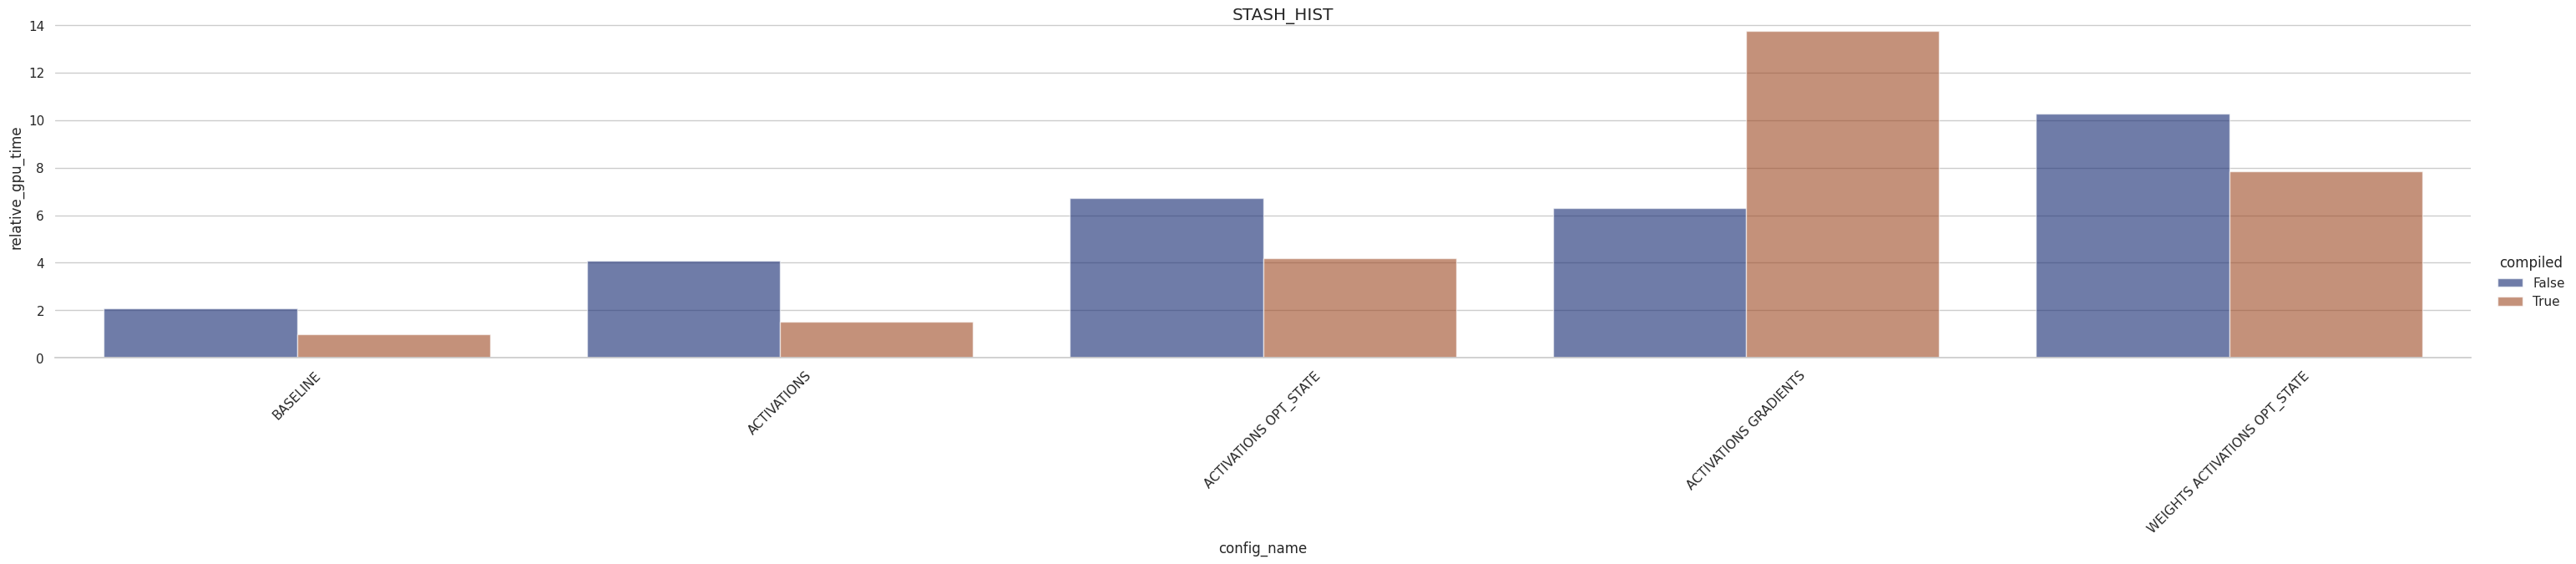

In [5]:
stashfn = 'stash_hist'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='relative_gpu_time',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.ax.xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())


Text(0.5, 0.98, 'STASH_SCALAR_STATS')

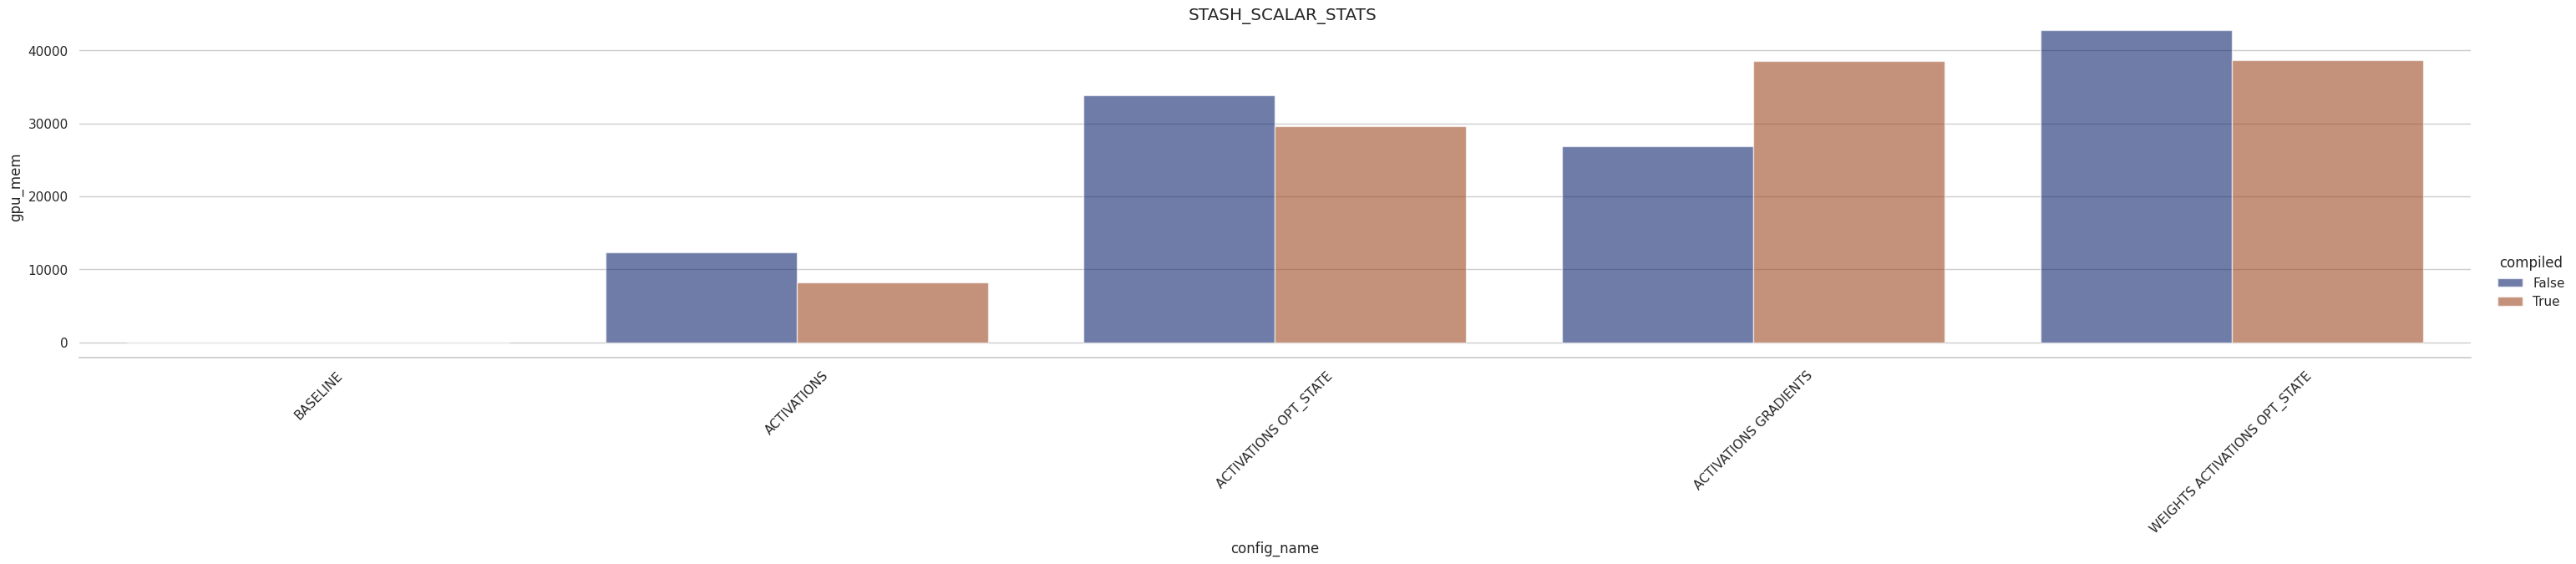

In [6]:
stashfn = 'stash_scalar_stats'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='gpu_mem',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.ax.xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())

Text(0.5, 0.98, 'DEFAULT_STASH_VALUE')

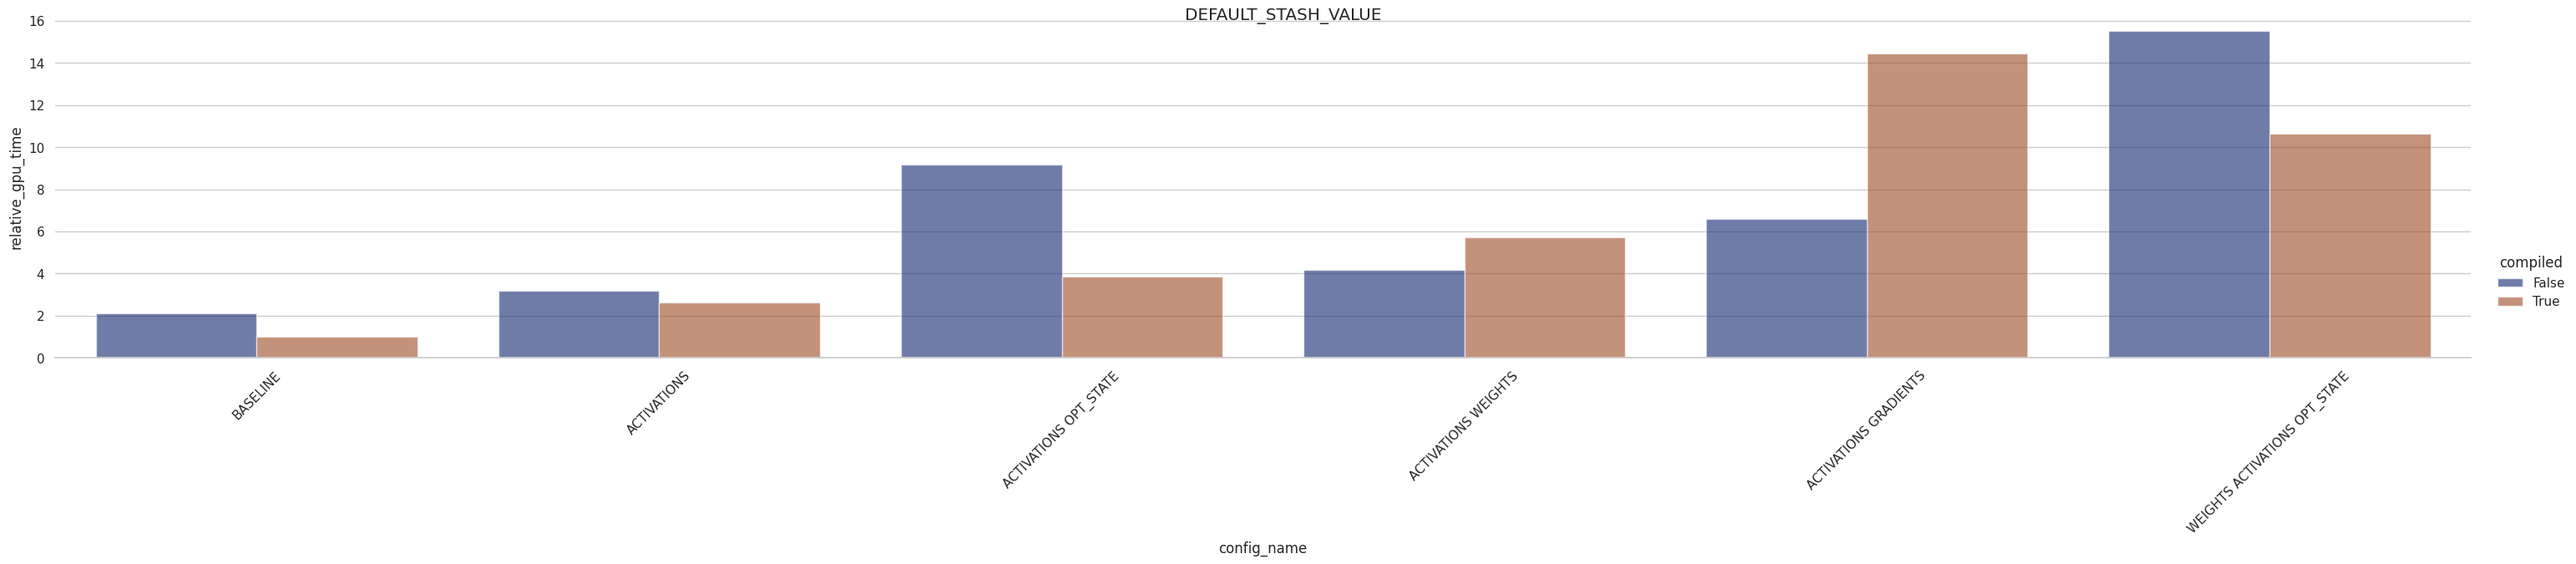

In [7]:
stashfn = 'stash_full_tensor'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='relative_gpu_time',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.axes[-1][0].xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())